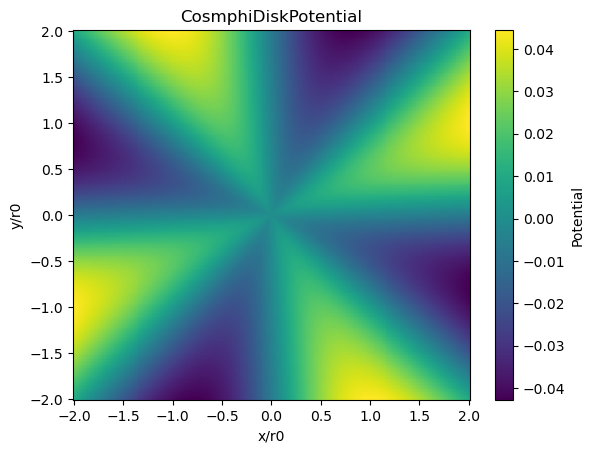

In [1]:
import galpy
import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import CosmphiDiskPotential

cp = CosmphiDiskPotential(
    amp=2.0, phib=0.4363323129985824, p=1.0,
    phio=0.01, m=4, r1=1.0
)

ro = 8.0 
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y, X)

Z = np.vectorize(cp)(R, phi)
fig,ax=plt.subplots()
c = ax.pcolormesh(X, Y, Z, shading='auto')
ax.set_xlabel('x/r0')
ax.set_ylabel('y/r0')
ax.set_title('CosmphiDiskPotential')
fig.colorbar(c, label='Potential')




C:\Users\erik_\anaconda3\envs\galpy-env\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:19: RuntimeWarning: overflow encountered in sinh
  return (numpy.sinh(numpy.pi * numpy.sinh(t)) + numpy.pi * t * numpy.cosh(t)) / (

C:\Users\erik_\anaconda3\envs\galpy-env\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:20: RuntimeWarning: overflow encountered in cosh
  numpy.cosh(numpy.pi * numpy.sinh(t)) + 1

C:\Users\erik_\anaconda3\envs\galpy-env\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:19: RuntimeWarning: invalid value encountered in divide
  return (numpy.sinh(numpy.pi * numpy.sinh(t)) + numpy.pi * t * numpy.cosh(t)) / (

C:\Users\erik_\anaconda3\envs\galpy-env\lib\site-packages\galpy\potential\plotRotcurve.py:196: RuntimeWarning: invalid value encountered in sqrt
  return numpy.sqrt(



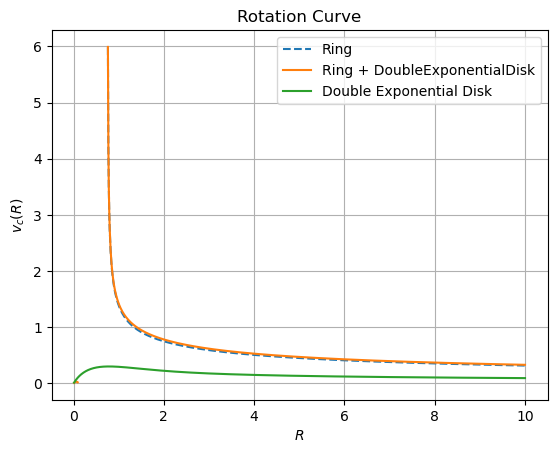

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import DoubleExponentialDiskPotential, RingPotential, vcirc

RP = RingPotential(amp=1.0, a=0.75, normalize=False)
DEDP = DoubleExponentialDiskPotential(amp=1.0, hr=1./3, hz=0.0625, normalize=False, de_h=0.001, de_n=10000)

R = np.linspace(0.01, 10.0, 1001)
vc_total = np.zeros_like(R)
vc_rp = np.zeros_like(R)
vc_dedp = np.zeros_like(R)

for i, r in enumerate(R):
    vc_total[i] = vcirc(RP + DEDP, r)

for i, r in enumerate(R):
    vc_rp[i] = vcirc(RP, r)

for i, r in enumerate(R):
    vc_dedp[i] = vcirc(DEDP, r)

fig,ax=plt.subplots()

ax.plot(R, vc_rp, label='Ring', ls='--')
ax.plot(R, vc_total, label='Ring + DoubleExponentialDisk')
ax.plot(R, vc_dedp, label='Double Exponential Disk')

ax.set_xlabel(r'$R$')
ax.set_ylabel(r'$v_c(R)$')
ax.set_title("Rotation Curve")
ax.legend()
ax.grid(True)

